In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
import inspect
from numpy import median
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

In [51]:
train_data = pd.read_csv('train.csv')
train_data['SalePriceLog'] = np.log1p(train_data['SalePrice'])
test_data = pd.read_csv('test.csv')

In [ ]:
sns.set(color_codes=True)
x = np.random.normal(size=100,scale = 0.1)

In [ ]:
sns.distplot(x,hist=False , kde=True,rug=True,norm_hist = False);

In [ ]:
sns.distplot(train_data['SalePrice'], hist=False , kde=True,rug=True);

In [ ]:
sns.distplot(train_data['SalePrice'], hist=True,kde=False ,rug=True);

In [ ]:
sns.distplot(train_data['SalePrice'], hist=False , kde=True,rug=True);

In [ ]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True);

In [ ]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True,fit=stats.norm);

In [ ]:
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=True , kde=False,rug=True,fit=stats.norm);

In [ ]:
#целевая переменная соответствует логнормальному распределению
class LogNormWrapper:
    def fit(self,data):
        return stats.lognorm.fit(data)
    def pdf(self,x,s,loc,scale):
        return stats.lognorm.pdf(x,0.35,loc,scale)
wrapper = LogNormWrapper()    
sns.distplot(preprocessing.scale(train_data['SalePrice'].astype(float)), hist=False , kde=True,rug=True,fit=wrapper)

In [ ]:
sns.scatterplot(x="MSSubClass", y="SalePrice", data=train_data)

In [ ]:
sns.scatterplot(x="MSSubClass", y="SalePrice", data=train_data)

In [ ]:

sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train_data.fillna(value="None2"));

In [ ]:
#assume na is same as none
sns.catplot(x="MasVnrType", y="SalePrice", kind="box", data=train_data.fillna(value="None"));

In [ ]:
sns.catplot(x="MasVnrType", kind="count", data=train_data.fillna(value="None2"));

In [ ]:
sns.catplot(x="Electrical", kind="count", data=train_data.fillna(value="None"));

In [ ]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train_data.fillna(value="None"));

In [ ]:
sns.catplot(x="Electrical", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.catplot(x="FullBath", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.distplot(train_data['LowQualFinSF'], hist=False,kde=True ,rug=True);

In [ ]:
sns.scatterplot(x="LowQualFinSF", y="SalePrice", data=train_data)

In [ ]:
sns.catplot(x="BsmtHalfBath", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.catplot(x="BsmtFullBath", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.catplot(x="BedroomAbvGr", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.catplot(x="KitchenAbvGr", y="SalePrice", kind="box", data=train_data);

In [ ]:
sns.scatterplot(x="KitchenAbvGr", y="SalePrice", data=train_data)

In [ ]:
sns.distplot(train_data['KitchenAbvGr'], hist=True,kde=True ,rug=True);

In [ ]:
sns.distplot(train_data['LotFrontage'], hist=False,kde=True ,rug=True);

In [ ]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(value = 0)
train_data['MasVnrType'] = train_data['MasVnrType'].fillna(value = 'Nan')
sns.scatterplot(x="MasVnrType", y="MasVnrArea", data=train_data)

In [ ]:
sns.catplot(x="MasVnrType", y="MasVnrArea", kind="box", data=train_data);

In [ ]:
result = train_data.groupby(['MSSubClass'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')
sns.barplot(x='MSSubClass', y='SalePrice', data=train_data, order=result['MSSubClass'],estimator=median) 



In [ ]:
result['MSSubClass']

In [ ]:
col = 'MSZoning'
result_neighborhood = train_data.groupby([col])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')
sns.barplot(x=col, y='SalePrice', data=train_data, order=result_neighborhood[col].values.tolist(),estimator=median) 


In [ ]:
result_neighborhood['Neighborhood'].values.to_list()

In [ ]:
train_data.groupby(['Neighborhood'])['Neighborhood','SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')['Neighborhood'].values.tolist()

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train_data.columns:
    if train_data[i].dtype in numeric_dtypes:
        numerics2.append(i)

skew_features = train_data[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = high_skew.index
skew_index

In [ ]:
sns.distplot(train_data['LotArea'], hist=False , kde=True,rug=True);

In [ ]:
for i in skew_index:
    train_data[i] = boxcox1p(train_data[i], boxcox_normmax(train_data[i] + 1))

In [ ]:
sns.distplot(train_data['LotArea'], hist=False , kde=True,rug=True);

In [ ]:
train_data["LotFrontage"].isnull().any()

In [ ]:
sns.catplot(x="Condition2",y = "SalePrice",kind = "bar",data=train_data, estimator=lambda x: len(x) / len(train_data)).set_axis_labels("MSZoning", "Percentage");

In [ ]:
sns.catplot(x="Condition1",y = "MSSubClass",kind = "bar",data=test_data.fillna(value = 'None'), estimator=lambda x: len(x) / len(train_data)).set_axis_labels("MSZoning", "Percentage");

In [ ]:
train_data['Utilities'].isnull().sum() / train_data['LotFrontage'].count()

In [ ]:
test_data['Utilities'].isnull().sum() / test_data['LotFrontage'].count()

In [ ]:
sns.distplot(test_data['LotArea'], hist=False , kde=True,rug=True);

In [ ]:
sns.distplot(train_data['LotArea'], hist=False , kde=True,rug=True);

In [ ]:
sns.catplot(x="LandSlope", y="SalePrice", kind="box", data=train_data.fillna(value="None"));

In [ ]:
sns.scatterplot(x=test_data["MasVnrArea"], y="SalePriceLog", data=train_data)

In [ ]:
sns.scatterplot("MasVnrArea", y="SalePriceLog", data=train_data)

In [59]:
train_data["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

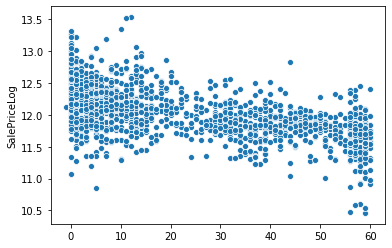

In [72]:
sns.scatterplot(train_data['YrSold'] - train_data['YearRemodAdd'], y="SalePriceLog", data=train_data.fillna(value = "Nan"))